
# Step by Step Practical Example: Solving Machine Learning Problems

## Step 1: Define the Problem

### Problem Statement

**Use information that we can reasonably expect to know about houses in California to predict their prices.**

What kind of information can we expect to know before a house is sold?
- **The number of bedrooms.**
- **The number of bathrooms.**
- **The size of the house.**
- **The location.**
- **The income level of the neighborhood in which it is being built.**

## Step 2: Find Relevant Datasets

Luckily, the following dataset with California Housing Prices is available on Kaggle:
https://www.kaggle.com/camnugent/california-housing-prices

## Step 3: Understand the Data

Now that we have a dataset, it's time to understand the data. In particular, we should focus on answering the following questions:

- What is the target variable?
- What are the feature columns?
- How are the feature columns and target variable distributed?
- Are there any apparent relationships between the features and targets?

### Import Basic Libraries

In the code cell below, I imported several commonly used libraries for data manipulation and visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Read the Data

In the code below, I read the csv file using pandas and displayed the first 10 rows to get a general view of the data.

In [2]:
housing_data = pd.read_csv('./data/housing.csv')
housing_data.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

We can get some more information about the data using the info() function in Pandas.

In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Understanding the Distribution of the Target Variable

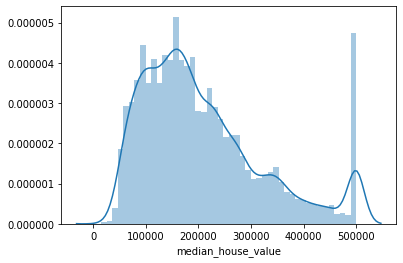

In [4]:
sns.distplot(housing_data['median_house_value'])

In [5]:
housing_data['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

### Visualizing Relationships Between Features

Seaborn's pairplot function is great for visualizing the relationships between many features all at once.

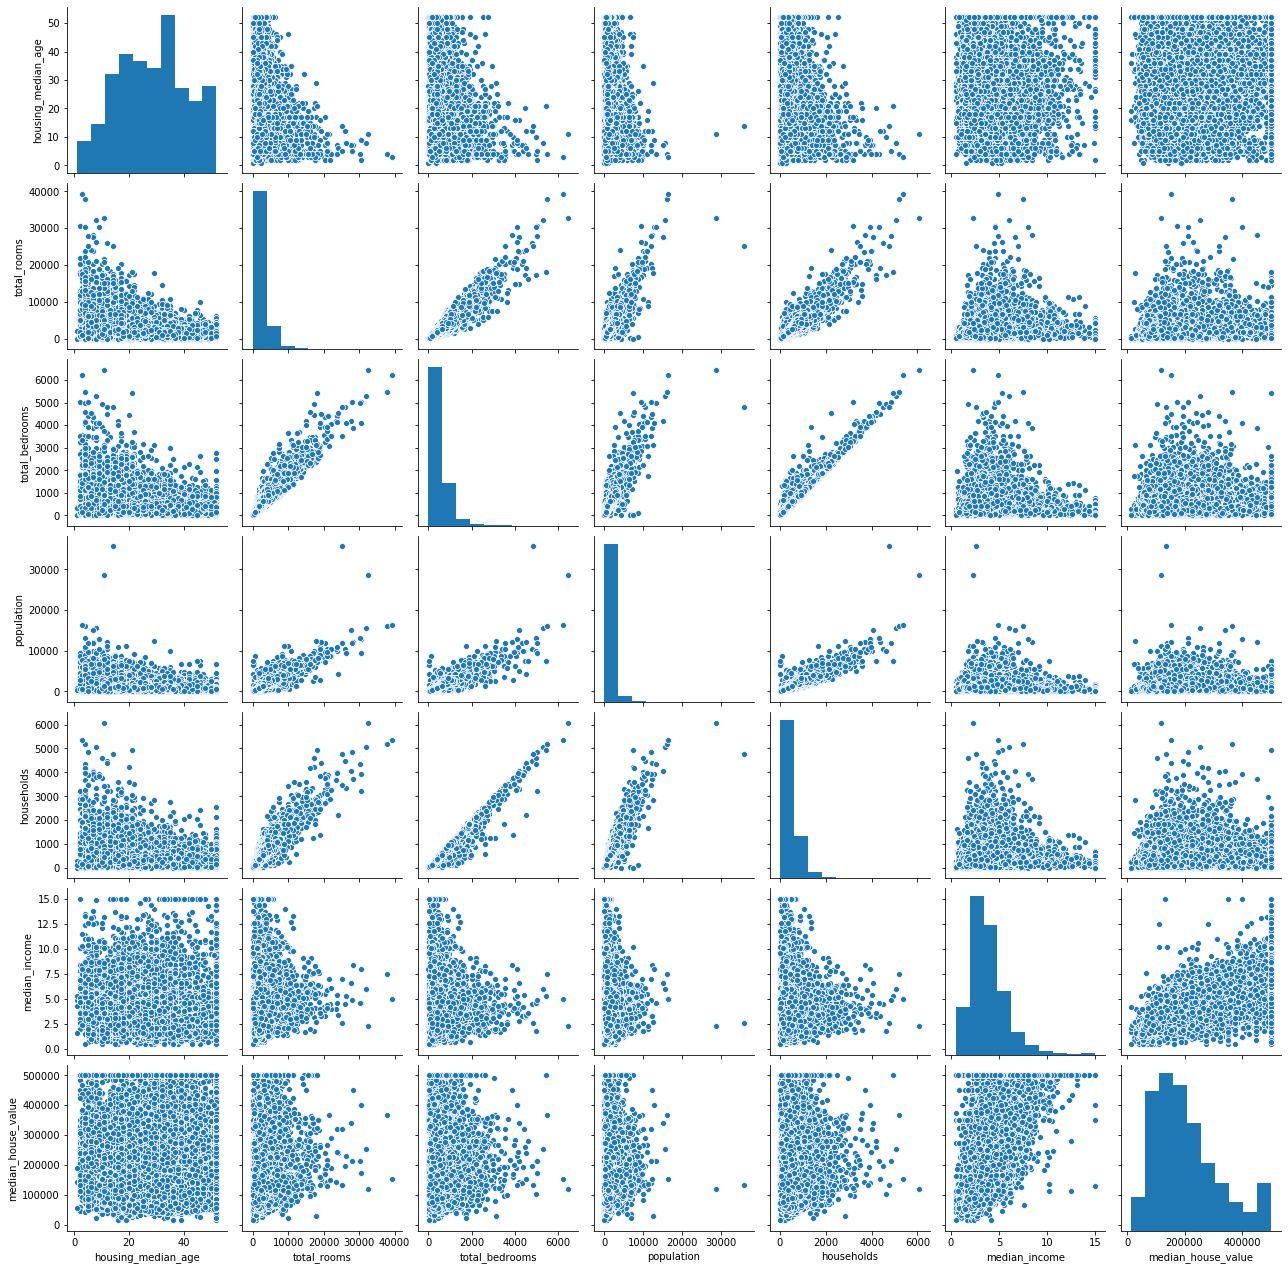

In [6]:
sns.pairplot(housing_data.drop(['ocean_proximity', 'longitude', 'latitude'], axis=1))

### Median Income and Median House Value

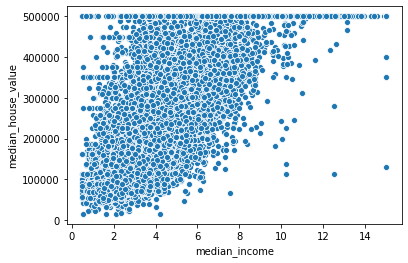

In [7]:
sns.scatterplot(data=housing_data, x='median_income', y='median_house_value')

Based on the plot above, there appears to be a rough positive correlation between the median income level and median house value. Houses in high-income areas are likely to be more expensive and this observation makes sense based on our understanding of the problem.

### Population and Median House Value

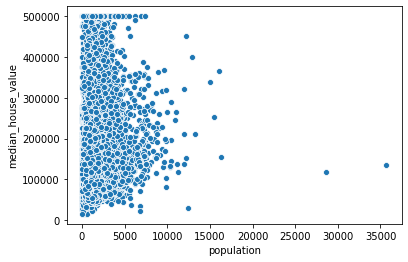

In [33]:
sns.scatterplot(data=housing_data, x='population', y='median_house_value')

Based on the plot above, there isn't a very clear direct or linear relationship between the population in an area and the value of houses in that area. Nevertheless, there may be a more complex relationship the population and the value of a house that takes into account the values of different features.

### Population Distribution

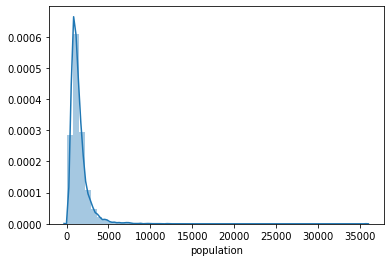

In [8]:
sns.distplot(housing_data['population'])

In [9]:
housing_data['population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

### Ocean Proximity

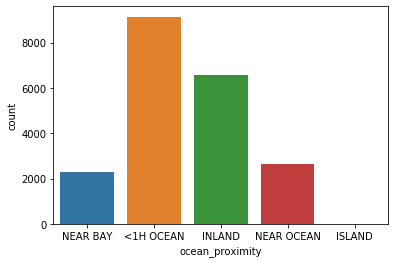

In [10]:
sns.countplot(housing_data['ocean_proximity'])

We can see based on the visualization above that most houses are either within an hour from the ocean or near the ocean. 

### Median Income Distribution

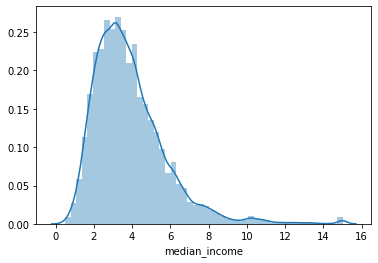

In [11]:
sns.distplot(housing_data['median_income'])

### Visualizing the Locations of Houses

The location of a house can be a key factor in determining it's price. Houses located near major cities may tend to more expensive than others.

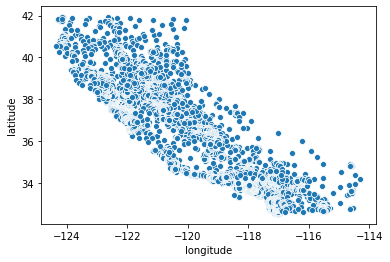

In [12]:
sns.scatterplot(data=housing_data, x='longitude', y='latitude')

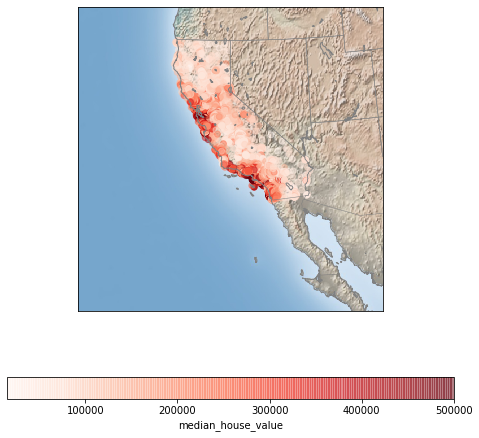

In [13]:
import os
# the line below avoids potential issues with basemap
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj") 
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(8, 8))
cal_map = Basemap(projection='lcc', resolution='h', 
            lat_0=35, lon_0=-120,
            width=2.0E6, height=2.0E6)
cal_map.shadedrelief()
cal_map.drawcoastlines(color='gray')
cal_map.drawcountries(color='gray')
cal_map.drawstates(color='gray')

cal_map.scatter(housing_data['longitude'].values, 
                housing_data['latitude'].values, c=housing_data['median_house_value'], 
                latlon=True, alpha=0.5, cmap='Reds')
plt.colorbar(label='median_house_value', orientation='horizontal')

Based on the visualizaiton above we can see that houses near the west coast of California tend to be more expensive than those located in the middle of the state. This observation makes sense since major cities such as Los Angeles and San Francisco are near the coast of California and are known for being more expensive in terms of real estate.

## Step 4: Prepare the Data for Machine Learning

Now that we have a good understanding of the data, it is time to prepare it for machine learning. For this dataset we need to perform the following steps:

- Splitting the data into features and targets.
- One hot encoding the **ocean_proximity** column.
- Imputing missing values (we can use a KNN Imputer algorithm).
- Feature engineering (optional but can lead to performance gains).

### Splitting the Data into Features and Targets

In [14]:
X = housing_data.drop(['median_house_value'], axis=1)
y = housing_data['median_house_value']

### One-Hot Encoding

In [15]:
X = pd.get_dummies(X, columns=['ocean_proximity'])

In [16]:
X = X.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity_within_1H_OCEAN'})

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   longitude                        20640 non-null  float64
 1   latitude                         20640 non-null  float64
 2   housing_median_age               20640 non-null  float64
 3   total_rooms                      20640 non-null  float64
 4   total_bedrooms                   20433 non-null  float64
 5   population                       20640 non-null  float64
 6   households                       20640 non-null  float64
 7   median_income                    20640 non-null  float64
 8   ocean_proximity_within_1H_OCEAN  20640 non-null  uint8  
 9   ocean_proximity_INLAND           20640 non-null  uint8  
 10  ocean_proximity_ISLAND           20640 non-null  uint8  
 11  ocean_proximity_NEAR BAY         20640 non-null  uint8  
 12  ocean_proximity_NE

### Imputing Missing Values
We can use the nearest neighbors imputer provided in Scikit-learn to impute the missing values present in the data.

In [18]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)

cols = X.columns
X_data = imputer.fit_transform(X)
X = pd.DataFrame(columns=cols, data=X_data)

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   longitude                        20640 non-null  float64
 1   latitude                         20640 non-null  float64
 2   housing_median_age               20640 non-null  float64
 3   total_rooms                      20640 non-null  float64
 4   total_bedrooms                   20640 non-null  float64
 5   population                       20640 non-null  float64
 6   households                       20640 non-null  float64
 7   median_income                    20640 non-null  float64
 8   ocean_proximity_within_1H_OCEAN  20640 non-null  float64
 9   ocean_proximity_INLAND           20640 non-null  float64
 10  ocean_proximity_ISLAND           20640 non-null  float64
 11  ocean_proximity_NEAR BAY         20640 non-null  float64
 12  ocean_proximity_NE

### Feature Engineering: Binning and Adding Categories

In [20]:
def get_population_category(population):
    
    if population < 500:
        return 0
    elif population < 1000:
        return 1
    elif population < 2000:
        return 2
    elif population < 5000:
        return 3
    else:
        return 4

X['income_category'] = X['median_income'].apply(lambda x: int(x/3.0))
X['population_category'] = X['population'].apply(lambda x: get_population_category(x))

### Feature Engineering: Getting Distances From Major Cities

Based on the domain knowledge we have about the problem it seems that the distances of houses from major cities could be useful features. We can use Geopy to get the coordinates of the largest cities and California and compute the distances of each city from these coordinates. In the could below I computed the geodesic distance - defined as the shortest path between two points on Earth's surface between each big city and the coordinates of each house in the dataset.

In [21]:
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
from collections import defaultdict

geocoder = Nominatim(user_agent='cal_housing_ml_app')

biggest_cities = ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 
                  'Fresno', 'Sacramento', 'Long Beach', 'Oakland']

location_dict = defaultdict()

for city in biggest_cities:
    location = geocoder.geocode(city)
    location_dict[city] = (location.latitude, location.longitude)
    
def get_distance_from_city(lat, lon, city):
    
    current_location = (lat, lon)
    city_location = location_dict[city]
    
    return geodesic(current_location, city_location).km

for city in biggest_cities:
    X['dist_from_' + city] = X.apply(lambda x: get_distance_from_city(x['latitude'], x['longitude'], city), axis=1)
    
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   longitude                        20640 non-null  float64
 1   latitude                         20640 non-null  float64
 2   housing_median_age               20640 non-null  float64
 3   total_rooms                      20640 non-null  float64
 4   total_bedrooms                   20640 non-null  float64
 5   population                       20640 non-null  float64
 6   households                       20640 non-null  float64
 7   median_income                    20640 non-null  float64
 8   ocean_proximity_within_1H_OCEAN  20640 non-null  float64
 9   ocean_proximity_INLAND           20640 non-null  float64
 10  ocean_proximity_ISLAND           20640 non-null  float64
 11  ocean_proximity_NEAR BAY         20640 non-null  float64
 12  ocean_proximity_NE

## Step 5: Establish a Cross-Validation Strategy

In this section, we will focus on the following steps:
- Selecting a performance metric.
- Defining a cross-validation strategy.
- Writing functions to perform cross-validation.
- Splitting the data into training and testing sets.

Here's a quick summary of the code that follows:
- I used the adjusted $r^2$ metric for evaluating my models because this metric, unlike the original $r^2$ metric, does not improve by adding additional features that aren't useful.
- The **evaluate_model** function performs two rounds of 5-fold cross validation where each round repeats the cross-validation with a different random sampling of folds (this is the repeated stratified k-fold cross-validation).
- I split the data such that 20 percent is used for testing, and 80 percent is used for training and validation.

In [22]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def adjusted_r2(estimator, X, y):
    
    pred = estimator.predict(X)
    r2 = r2_score(pred, y) 
    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - ((1 - r2) * (n - 1)/(n - p - 1))
    return adj_r2

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, random_state=1, n_repeats=2)
    scores = cross_val_score(model, X, y, scoring=adjusted_r2, cv=cv, verbose=2, n_jobs=5, error_score='raise')
    return scores


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Train and Evaluate Machine Learning Models

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from collections import defaultdict

models_dict = {'random_forest': RandomForestRegressor(n_estimators=100, n_jobs=-1),
               'neural_network': Pipeline([('scaler', StandardScaler()),
                                           ('mlp', MLPRegressor(hidden_layer_sizes=(100, 100)))]),
               'xgboost': XGBRegressor(n_estimators=100, n_jobs=-1),
               'knn': Pipeline([('scaler', StandardScaler()),
                                ('knn', KNeighborsRegressor(n_neighbors=13))])
               
               }

In [24]:
model_scores = defaultdict()
model_names = []

for name, model in models_dict.items():
    print('Evaluating {}'.format(name))
    scores = evaluate_model(model, X_train, y_train)
    model_scores[name] = scores
    model_names.append(name)

Evaluating random_forest


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:   31.9s remaining:   13.7s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:   32.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Evaluating neural_network


[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:   55.3s remaining:   23.7s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:   55.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Evaluating xgboost


[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    5.7s remaining:    2.4s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    5.8s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Evaluating knn


[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    3.2s remaining:    1.4s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    3.3s finished


In [25]:
import plotly.graph_objects as go

def plot_results(model_scores):
    
    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            y=result,
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )
    
    fig.update_layout(
    title='Performance of Different Models Using 5-Fold Cross-Validation',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    xaxis_title='Model',
    yaxis_title='Adjusted R^2 Coefficient',
    showlegend=False)
    fig.show()
    fig.write_image("images/cross_validation.png")
    
plot_results(model_scores)

Based on the graph above, it is clear that the random forest is the best model for this problem since it significantly outperformed all of the other models.

## Step 7: Model-Tuning and Improvement

In the code below, I used a randomized search to find the best hyperparameters for the random forest model. Notice how I specified a distribution (randint) for the **n_estimators** and **max_features** hyperparameters. The search will perform 5-fold cross-validation for 20 different random sets of hyperparameters.

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param = {'max_depth': [6,9,None], 
         'n_estimators': randint(50, 200), 
          'max_features': randint(4,9),
          'bootstrap':[True, False]}

rand_search = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1), 
                                param, 
                                n_iter=20, 
                                cv=5,
                                scoring=adjusted_r2,
                                verbose=2,
                                n_jobs=-1)
rand_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [27]:
rand_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=169, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
rand_search.best_score_

0.815506361440295

### Computing the Testing Metrics for the Best Model

We have cross-validation metrics for the random forest but we also need to check the model's performance on the testing data as demonstrated in the code below.

In [29]:
from sklearn.metrics import mean_absolute_error
pred = rand_search.best_estimator_.predict(X_test)
print('Testing MAE = {}'.format(mean_absolute_error(pred, y_test)))
print('Testing Adjusted R^2 = {}'.format(adjusted_r2(rand_search.best_estimator_, X_test, y_test)))

Testing MAE = 28130.879090982064
Testing Adjusted R^2 = 0.8153684082015918


The performance of the model can probably be improved further by performing more feature engineering or hyperparameter tuning but these metrics might be good enough for us to deploy this model with a reasonable level of confidence.

## Step 8: Model Deployment

### Retraining the model on the Entire Dataset

Keep in mind that the model was only trained on a subset of the entire dataset and we may want to retrain it on the entire dataset for better results in production.

In [30]:
rf = rand_search.best_estimator_
rf.fit(X, y)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=169, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Saving the Model with Joblib
Joblib is a simple and convenient option for saving the model so that it can be reused later.

In [31]:
from joblib import dump
dump(rf, 'random_forest.joblib')

['random_forest.joblib']

### Saving the Model to PMML

PMML is a bit more complex than joblib, but it is an industry standard for several applications and allows us to represent the model in an XML-based document.

In [32]:
from sklearn2pmml import make_pmml_pipeline, sklearn2pmml
pmml_pipeline = make_pmml_pipeline(rf, X.columns.values, y.name)
sklearn2pmml(pmml_pipeline, 'random_forest.pmml', with_repr=True)

## Thanks for reading!

If you found this tutorial useful or have any questions, feel free to contact me at blog@amolmavuduru.com or at amolmavuduru@gmail.com. 

<center> &copy; Copyright 2020, Amol Mavuduru </center>